<a href="https://colab.research.google.com/github/dudgus7477/datascience/blob/main/24.%20(%EC%8B%A4%EC%8A%B5%EC%9A%A9)%20%EC%88%AB%EC%9E%90%20%EA%B7%B8%EB%A6%BC%20%EC%9D%B8%EC%8B%9D(DNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#숫자 그림 인식하기
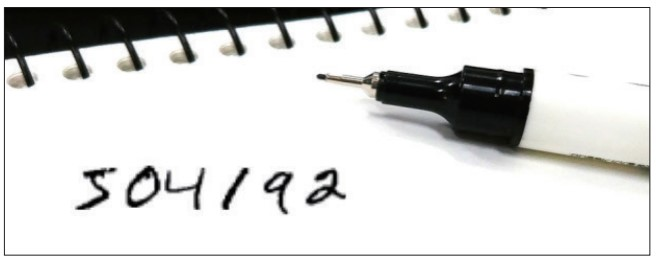

- 컴퓨터에게 이 글씨를 읽게 하고 이 글씨가 어떤 의미인지 알게 하는 과정은 쉽지 않음
- 사람이 볼 때는 쉽게 알 수 있는 글씨라 해도 숫자 5는 어떤 특징을 가졌고, 숫자 9는 6과 어떻게 다른지 기계가 스스로 파악해 정확하게 읽고 판단하게 만드는 것은 머신 러닝의 오랜 과제

> MNIST 데이터셋은 미국 고등학생과 인구조사국 직원 등이 쓴 손글씨를 이용해 만든 데이터로 구성됨
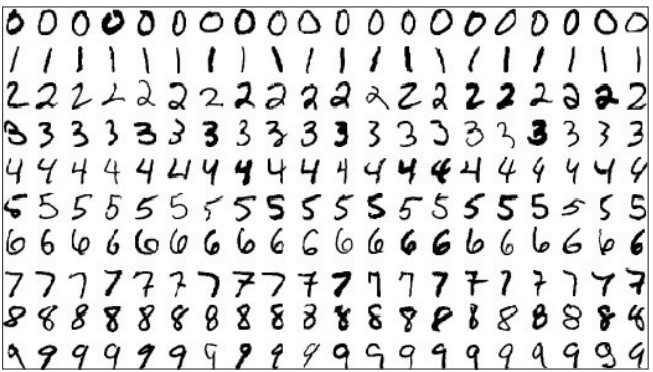

#1. 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
#데이터 불러오기


In [ ]:
#데이터 확인


In [ ]:
#불러온 이미지 중 한개만 확인해보자!


###▶ 이미지를 인식하는 원리


####*   이 이미지는 가로 28, 세로 28 총 784개의 픽셀로 이루어짐
####*   각 픽셀은 밝기 정도에 따라 0부터 255까지 등급을 매김



In [ ]:
#픽셀로 확인하기
import sys

for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

####✅ 바로 이렇게 이미지는 다시 숫자의 집합으로 바뀌어 학습셋으로 사용
####✅ 28x28 = 784개의 속성을 이용해 0~9의 클래스 열 개 중 하나를 맞히는 문제가 됨

In [ ]:
# 가로 세로 2차원 배열을 1차원 배열로 바꿔주기!


In [ ]:
#케라스는 데이터를 0에서 1사이의 값으로 변환한 후 구동할 때 최적의 성능을 보임

#정규화 과정
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [ ]:
# 숫자 이미지에 매겨진 이름을 확인해보자!

## 딥러닝 분류 문제를 해결하려면 원-핫 인코딩 방식을 적용해야함.
####❣ 즉, 0~9의 정수형 값을 갖는 현재 형태에서 0또는 1로만 이루어진 벡터로 값을 수정
####❣ [5] -> [0,0,0,0,0,1,0,0,0,0]

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
#잘 변환되었는지 확인

#2. 딥러닝 모델 만들기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np

In [ ]:
#입력층 및 은닉층, 출력층
model = Sequential()
model.add(Dense(512, input_dim= , activation=' '))
model.add(Dense(10, activation=' '))

In [ ]:
#다중분류일때 손실함수
model.compile(loss='', optimizer='adam', metrics=['accuracy']) #다중분류일때 손실함수

- 모델 실행에 앞서 먼저 성과를 저장하고, 모델의 최적화 단계에서는 학습을 자동 중단하게끔 설정
- 열 번 이상 모델 성능이 향상되지 않으면 자동으로 학습을 중단

In [ ]:
modelpath = "./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
#모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, y_test)[1]))

In [1]:
# 학습이 진행될 때 학습셋과 테스트셋의 오차 변화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 인공지능이 잘 구분한 그림과 잘 구분하지 않은 그림 살펴보기



In [ ]:
#잘 구분한 그림
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct =
  plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
  plt.tight_layout()

In [ ]:
#잘 구분하지 못한 그림
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect =
  plt.imshow(X_test[incorrect].reshape(28,28), cmap = 'gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
  plt.tight_layout()

# 내가 쓴 숫자 인식하기

In [ ]:
#내가 쓴 숫자 불러오기
from PIL import Image

img = Image.open(" ")
img = img.resize((28,28))
img_data = np.array(img)
img_data.shape

In [ ]:
#그림 확인


In [ ]:
#재배치
trans_img = img_data.transpose(2,0,1)
trans_img.shape

(3, 28, 28)

In [ ]:
#정규화
trans_test_img = trans_img[0].reshape(1,28*28)
trans_test_img = trans_test_img.astype('float32')/255

In [ ]:
#예측결과
